In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from gaia_download import vari_class, vari_short_timescale
import gPhoton
from download_isochrone import load_isochrone
from extinction import add_colors_and_abs_mag
import plotly.graph_objects as go
from simbad_download import fetch_catalog_id
import pyvo as vo

from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord, ICRS
import astropy.units as u
from download_lightcurves import download_dr3_lightcurve

In [2]:
CLUSTER_NAME: str = 'King 11'

In [16]:
bss_candidates = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_bss.csv')
yss_candidates = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_yss.csv')

bss_candidates = add_colors_and_abs_mag(bss_candidates)
yss_candidates = add_colors_and_abs_mag(yss_candidates)

In [4]:
sources = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}.csv')
clustered = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
isochrone = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

In [5]:
sim2 = Simbad()
n_obj = sim2.query_bibobj('2015ApJ...814..163G')

In [6]:
bss_lit = n_obj.to_pandas()

In [7]:
bss_lit.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
0,NGC 104,00 24 05.359,-72 04 53.20,7,7,NaN,NaN,0,C,I,2006AJ....131.1163S,1
1,Cl* NGC 188 DGV 1666,00 26 44.6223,+85 18 35.993,14,14,0.0200,0.0214,90,A,O,2020yCat.1350....0G,1
2,Cl* NGC 188 DGV 1874,00 34 48.0051,+85 32 27.395,14,14,0.0211,0.0224,90,A,O,2020yCat.1350....0G,1
3,Cl* NGC 188 DGV 198,00 35 46.2973,+84 57 14.325,14,14,0.0142,0.0143,90,A,O,2020yCat.1350....0G,1
4,Cl* NGC 188 DGV 237,00 40 15.5401,+85 03 48.459,14,14,0.0259,0.0272,90,A,O,2020yCat.1350....0G,1


In [9]:
def get_gaia_dr3(main_id: str):
    try:
        return int([s[0] 
             for s 
             in Simbad.query_objectids(main_id).to_pandas().values 
             if 'EDR3' in str(s[0])][0]
            .decode('ascii')
            .replace('Gaia EDR3 ', ''))
    except:
        return None

In [10]:
def get_gaia_dr2(main_id: str):
    try:
        return int([s[0] 
             for s 
             in Simbad.query_objectids(main_id).to_pandas().values 
             if 'DR2' in str(s[0])][0]
            .decode('ascii')
            .replace('Gaia DR2 ', ''))
    except:
        return None

In [11]:
bss_lit['EDR3 id'] = np.vectorize(get_gaia_dr3)(bss_lit['MAIN_ID'].values)
bss_lit['DR2 id'] = np.vectorize(get_gaia_dr2)(bss_lit['MAIN_ID'].values)

In [12]:
bss_lit.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID,EDR3 id,DR2 id
0,NGC 104,00 24 05.359,-72 04 53.20,7,7,NaN,NaN,0,C,I,2006AJ....131.1163S,1,None,None
1,Cl* NGC 188 DGV 1666,00 26 44.6223,+85 18 35.993,14,14,0.0200,0.0214,90,A,O,2020yCat.1350....0G,1,573998091072694912,573998091072694912
2,Cl* NGC 188 DGV 1874,00 34 48.0051,+85 32 27.395,14,14,0.0211,0.0224,90,A,O,2020yCat.1350....0G,1,573961463591544064,573961463591544064
3,Cl* NGC 188 DGV 198,00 35 46.2973,+84 57 14.325,14,14,0.0142,0.0143,90,A,O,2020yCat.1350....0G,1,573568078948251136,573568078948251136
4,Cl* NGC 188 DGV 237,00 40 15.5401,+85 03 48.459,14,14,0.0259,0.0272,90,A,O,2020yCat.1350....0G,1,573933322966008960,573933322966008960


In [13]:
coords = SkyCoord(ra=bss_lit.RA, dec=bss_lit.DEC, unit=(u.hourangle, u.deg), frame=ICRS)

In [14]:
bss_lit.RA = coords.ra.value
bss_lit.DEC = coords.dec.value
bss_lit.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID,EDR3 id,DR2 id
0,NGC 104,6.022329,-72.081444,7,7,NaN,NaN,0,C,I,2006AJ....131.1163S,1,None,None
1,Cl* NGC 188 DGV 1666,6.685926,85.309998,14,14,0.0200,0.0214,90,A,O,2020yCat.1350....0G,1,573998091072694912,573998091072694912
2,Cl* NGC 188 DGV 1874,8.700021,85.540943,14,14,0.0211,0.0224,90,A,O,2020yCat.1350....0G,1,573961463591544064,573961463591544064
3,Cl* NGC 188 DGV 198,8.942905,84.953979,14,14,0.0142,0.0143,90,A,O,2020yCat.1350....0G,1,573568078948251136,573568078948251136
4,Cl* NGC 188 DGV 237,10.064750,85.063461,14,14,0.0259,0.0272,90,A,O,2020yCat.1350....0G,1,573933322966008960,573933322966008960


In [15]:
len(bss_lit.dropna(subset=['EDR3 id']))

22

In [16]:
bss_lit[pd.isnull(bss_lit['EDR3 id'])].head(10)

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID,EDR3 id,DR2 id
0,NGC 104,6.022329,-72.081444,7,7,NaN,NaN,0,C,I,2006AJ....131.1163S,1,None,None
12,NGC 188,11.800000,85.243333,4,4,NaN,NaN,0,D,O,2020A&A...633A..99C,1,None,None
24,NGC 2682,132.845833,11.813333,4,4,NaN,NaN,0,D,O,2020A&A...633A..99C,1,None,None
25,M 30,325.092167,-23.179861,6,6,100.0,100.0,90,C,O,2010AJ....140.1830G,1,None,None


In [17]:
bss_lit = bss_lit.dropna(subset=['EDR3 id'])

In [18]:
def get_cross_match(ra, dec, df):
    dist = u.arcsec.to(u.deg)
    a = df[np.isclose(ra, df.ra, dist) & np.isclose(dec, df.dec, dist)]
    try:
        return a['source_id'].values[0]
    except:
        return None

In [19]:
cross_matched_lit = bss_lit.apply(lambda x: get_cross_match(x['RA'], x['DEC'], sources), axis=1)
bss_lit['Gaia EDR3'] = cross_matched_lit

In [20]:
bss_lit = bss_lit.dropna(subset=['EDR3 id'])

In [21]:
in_bss_candidates = np.in1d(bss_lit['Gaia EDR3'].values,
                            bss_candidates['source_id'].values)
bss_lit['in_bss'] = in_bss_candidates

In [22]:
bss_lit = pd.merge(left=bss_lit, right=sources, left_on='Gaia EDR3', right_on='source_id',
                   suffixes=('_lit', '_src'))

In [23]:
in_cluster = np.in1d(bss_lit['Gaia EDR3'].values,
                     clustered['source_id'].values)

In [24]:
bss_lit['in_cluster'] = in_cluster
bss_lit.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,...,A_y,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,in_cluster
0,Cl* NGC 188 DGV 1666,6.685926,85.309998,14,14,0.0200,0.0214,90,A,O,...,0.352377,0.221163,0.130851,0.084425,0.571064,0.001893,3.302747,0.092027,0.005883,True
1,Cl* NGC 188 DGV 198,8.942905,84.953979,14,14,0.0142,0.0143,90,A,O,...,0.156612,0.098295,0.058156,0.037522,0.718240,0.001535,2.342432,0.080358,-0.000019,False
2,Cl* NGC 188 DGV 237,10.064750,85.063461,14,14,0.0259,0.0272,90,A,O,...,0.352377,0.221163,0.130851,0.084425,0.705798,0.003497,4.056418,0.124364,0.008074,True
3,NGC 188 3151,10.527558,85.279800,14,14,0.0126,0.0119,90,A,O,...,0.391530,0.245737,0.145390,0.093806,0.616632,0.001233,2.377883,0.054560,0.005897,True
4,NGC 188 2046,10.586150,85.260976,14,14,0.0103,0.0093,90,A,O,...,0.391530,0.245737,0.145390,0.093806,0.584572,0.000663,1.529322,0.043625,0.005892,True


In [25]:
missed_bss = bss_lit[~bss_lit.in_bss]

In [26]:
len(missed_bss)

7

In [27]:
missed_bss.parallax_over_error

1     27.022552
2     17.460733
7     15.048694
15    11.926151
16    14.467278
17    15.087319
20    51.153877
Name: parallax_over_error, dtype: float64

In [28]:
%matplotlib notebook

<IPython.core.display.Javascript object>


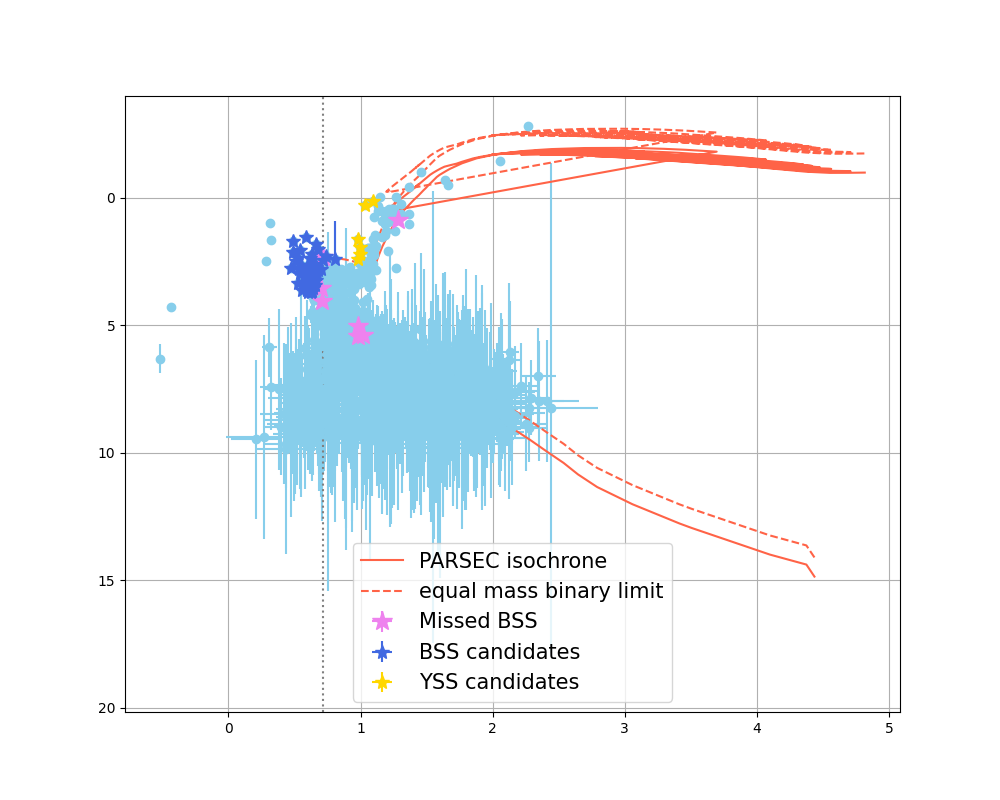

/home/mjablons/.local/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/mjablons/.local/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


In [29]:
plt.figure(figsize=(10, 8))
TO_COLOR = np.min(isochrone[:, 0])
plt.errorbar(clustered['BP-RP'], clustered['G_abs'],
             xerr=clustered['BP-RP_error'], yerr=clustered['G_abs_error'],
             color='skyblue', fmt='o')
plt.errorbar(missed_bss['BP-RP'], missed_bss['G_abs'],
             xerr=missed_bss['BP-RP_error'], yerr=missed_bss['G_abs_error'],
             color='violet', fmt='*', zorder=2, markersize=15.,
             label='Missed BSS')
plt.errorbar(bss_candidates['BP-RP'], bss_candidates['G_abs'],
             xerr=bss_candidates['BP-RP_error'], yerr=bss_candidates['G_abs_error'],
             color='royalblue', fmt='*', zorder=2, label='BSS candidates', markersize=10.)
plt.errorbar(yss_candidates['BP-RP'], yss_candidates['G_abs'],
             xerr=yss_candidates['BP-RP_error'], yerr=yss_candidates['G_abs_error'],
             color='gold', fmt='*', zorder=2, label='YSS candidates', markersize=10.)

plt.grid()

plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', label='PARSEC isochrone')
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', label='equal mass binary limit',
         linestyle='--')
plt.axvline(x=TO_COLOR, color='gray', linestyle='dotted')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);
plt.show();

In [30]:
not_clustered = missed_bss[~missed_bss.in_cluster & (missed_bss.G_abs<3.5)]

In [31]:
not_clustered.parallax_over_error

1    27.022552
Name: parallax_over_error, dtype: float64

In [32]:
not_clustered.parallax

1    0.435717
Name: parallax, dtype: float64

In [33]:
not_clustered.pmra

1   -1.845753
Name: pmra, dtype: float64

<IPython.core.display.Javascript object>


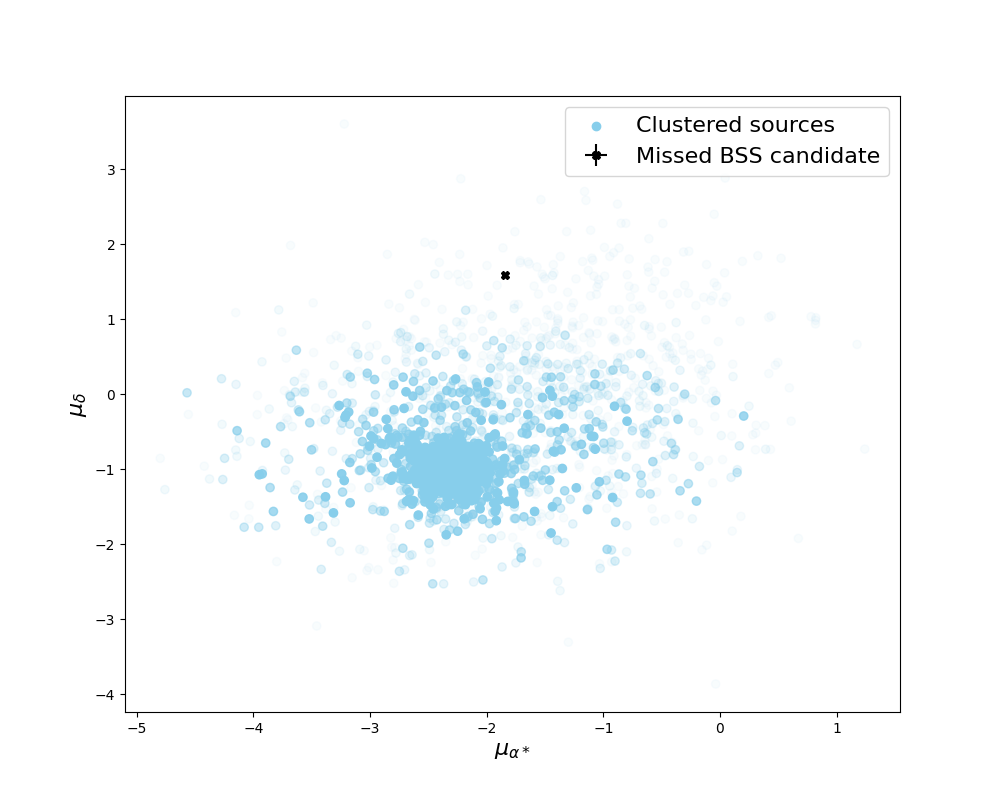

In [34]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered.pmra, clustered.pmdec, zorder=1, color='skyblue',
            alpha=clustered.occurences,
            label='Clustered sources')
plt.errorbar(not_clustered.pmra, not_clustered.pmdec,
             xerr=not_clustered.pmra_error, yerr=not_clustered.pmdec_error,
             fmt='X', zorder=2, color='black',
             label='Missed BSS candidate')
plt.gca().set_xlabel('$\mu_{\\alpha*}$', fontsize=16)
plt.gca().set_ylabel('$\mu_\delta$', fontsize=16)
lgnd = plt.legend(fontsize=16);
for handle in lgnd.legendHandles:
    handle._alpha = [1];

In [35]:
bss_candidates = pd.concat([bss_candidates,
                           clustered[np.isclose(clustered['BP-RP'], 0.6, 1e-2) & np.isclose(clustered['G_abs'], 3.75, .1)],
                           clustered[(clustered['BP-RP']<=0.66) & (clustered['G_abs']<=3.7)]])

In [36]:
yss_candidates = pd.concat([yss_candidates,
                            clustered[np.isclose(clustered['BP-RP'], 1.075, 1e-2) & np.isclose(clustered['G_abs'], 2.13, .01)]])

In [37]:
TO_COLOR = np.min(isochrone[:, 0])

In [38]:
yss_candidates = yss_candidates[yss_candidates['BP-RP']<1.25]

In [39]:
yss_candidates = yss_candidates[~(np.isclose(yss_candidates['BP-RP'], 1.07, .01))]

In [40]:
bss_candidates = bss_candidates[~((bss_candidates['BP-RP']>0.7) & (bss_candidates['G_abs']>2.75) |
                                  (bss_candidates['BP-RP']<0.35))]

In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


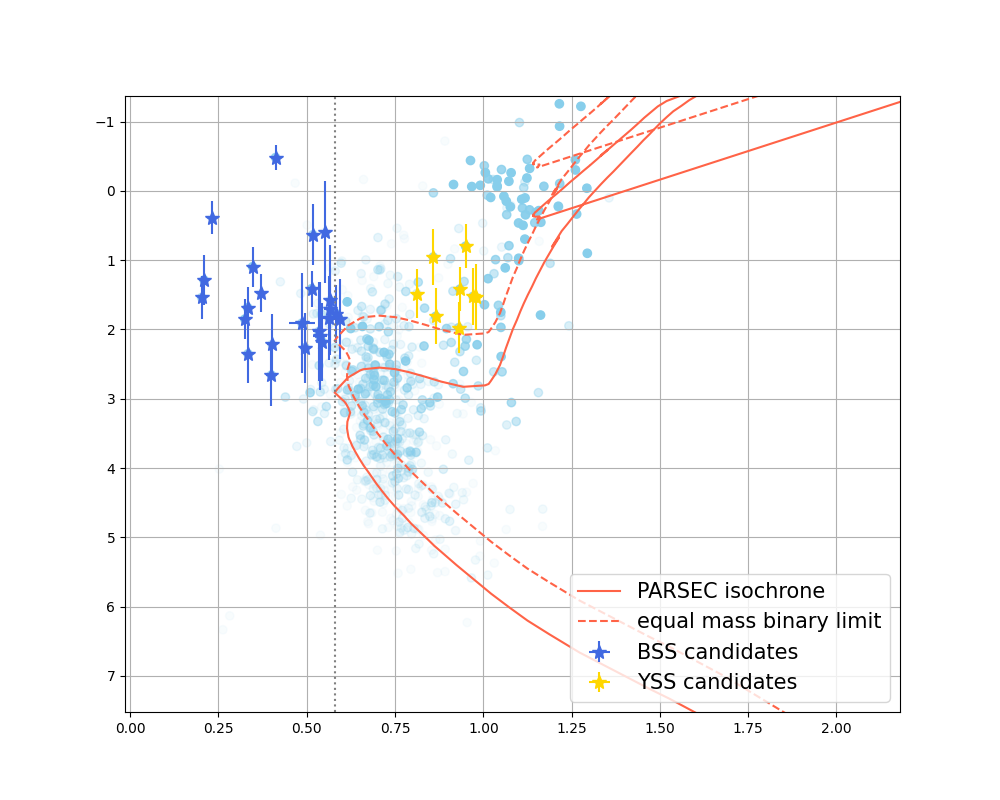

In [42]:
plt.figure(figsize=(10, 8))
TO_COLOR = np.min(isochrone[:, 0])
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', alpha=clustered['occurences'])
plt.errorbar(bss_candidates['BP-RP'], bss_candidates['G_abs'],
             xerr=bss_candidates['BP-RP_error'], yerr=bss_candidates['G_abs_error'],
             color='royalblue', fmt='*', zorder=2, label='BSS candidates', markersize=10.)
plt.errorbar(yss_candidates['BP-RP'], yss_candidates['G_abs'],
             xerr=yss_candidates['BP-RP_error'], yerr=yss_candidates['G_abs_error'],
             color='gold', fmt='*', zorder=2, label='YSS candidates', markersize=10.)

plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', label='PARSEC isochrone')
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', label='equal mass binary limit',
         linestyle='--')
plt.axvline(x=TO_COLOR, color='gray', linestyle='dotted')
plt.gca().invert_yaxis();
plt.legend(fontsize=15, loc='lower right');
plt.grid();

In [41]:
bss_candidates = bss_candidates[~((bss_candidates.G_abs<1.8)&(bss_candidates['BP-RP']>0.62))]
bss_candidates = bss_candidates[~((bss_candidates.G_abs>2.) & (bss_candidates['BP-RP']>0.6))]

In [17]:
np.quantile(bss_candidates.G_abs_error, [.5])

array([0.80691474])

In [18]:
bss_candidates = bss_candidates[bss_candidates.G_abs_error<np.quantile(bss_candidates.G_abs_error, [.5])[0]]

In [43]:
len(bss_candidates)

24

In [21]:
yss_candidates = yss_candidates[yss_candidates.G_abs_error<np.quantile(yss_candidates.G_abs_error, [.5])[0]]

In [30]:
yss_candidates = yss_candidates[(yss_candidates.G_abs<2)&(yss_candidates['BP-RP']<=1.)&
                                (yss_candidates.G_abs>.5)]

In [31]:
len(yss_candidates)

8

<IPython.core.display.Javascript object>


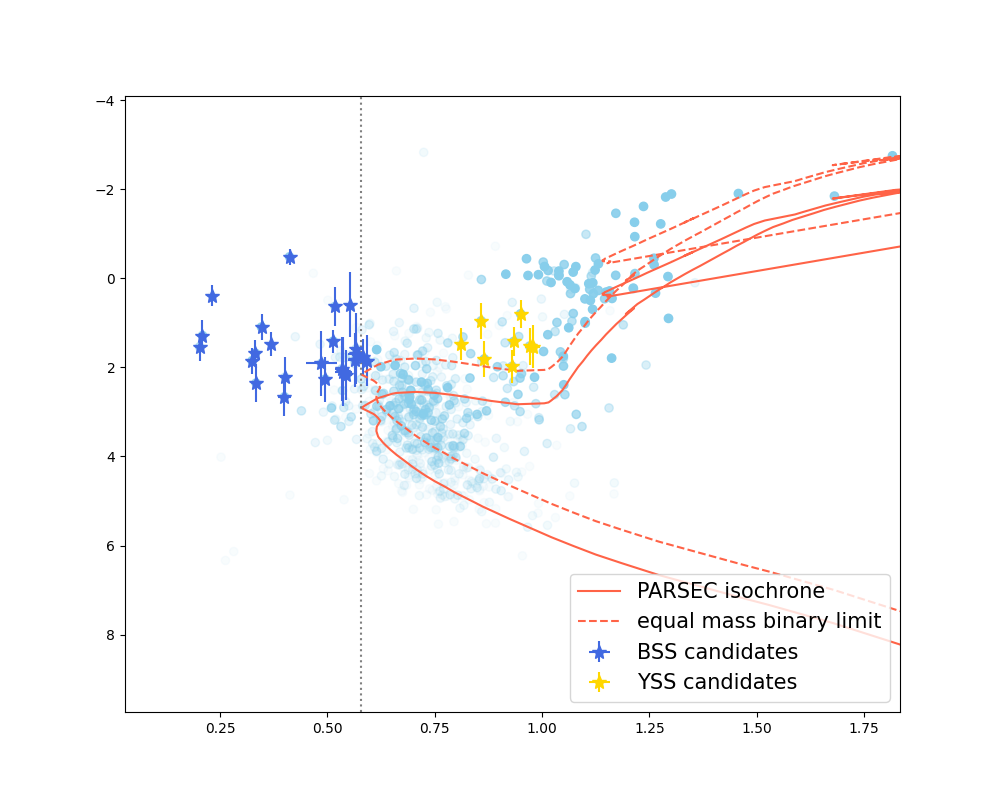

In [44]:
plt.figure(figsize=(10, 8))
TO_COLOR = np.min(isochrone[:, 0])
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', alpha=clustered['occurences'])
plt.errorbar(bss_candidates['BP-RP'], bss_candidates['G_abs'],
             xerr=bss_candidates['BP-RP_error'], yerr=bss_candidates['G_abs_error'],
             color='royalblue', fmt='*', zorder=2, label='BSS candidates', markersize=10.)
plt.errorbar(yss_candidates['BP-RP'], yss_candidates['G_abs'],
             xerr=yss_candidates['BP-RP_error'], yerr=yss_candidates['G_abs_error'],
             color='gold', fmt='*', zorder=2, label='YSS candidates', markersize=10.)

plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', label='PARSEC isochrone')
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', label='equal mass binary limit',
         linestyle='--')
plt.axvline(x=TO_COLOR, color='gray', linestyle='dotted')
plt.gca().invert_yaxis();
plt.legend(fontsize=15, loc='lower right');

# BSS variability

In [45]:
bss_candidates = add_colors_and_abs_mag(bss_candidates).drop_duplicates(subset=['source_id'])

In [46]:
bss_candidates.head()

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences,outlier
1,9651,1636148068921376768,Gaia DR3 2214223179172287744,2214223179172287744,446813392,2016.0,-3.094110,0.038180,68.717080,0.035013,...,1.410283,0.909918,0.332349,0.005824,1.684021,0.293660,0.123704,0,0.90,-1
2,42128,1636148068921376768,Gaia DR3 2211125275102450816,2211125275102450816,1468023234,2016.0,-3.127598,0.030110,68.598812,0.030250,...,1.264893,0.816112,0.346440,0.004239,1.094914,0.286305,0.111937,0,0.90,-1
3,42150,1636148068921376768,Gaia DR3 2211125378181994112,2211125378181994112,913773861,2016.0,-3.250037,0.060405,68.593959,0.064844,...,1.395744,0.900538,0.567210,0.013301,1.577995,0.791704,0.134044,0,0.35,1
4,42174,1636148068921376768,Gaia DR3 2211125476959735680,2211125476959735680,460212261,2016.0,-3.101076,0.048254,68.615038,0.045938,...,1.395744,0.900538,0.583240,0.008098,1.772845,0.416810,0.134613,0,0.80,1
7,42390,1636148068921376768,Gaia DR3 2211126301593476864,2211126301593476864,8682490,2016.0,-3.111000,0.055656,68.631937,0.050741,...,1.374712,0.886968,0.333672,0.009234,2.351953,0.416721,0.102567,0,0.75,-1


In [47]:
bss_var = bss_candidates[bss_candidates.phot_variable_flag=='VARIABLE']

In [48]:
bss_classes = vari_class(bss_var.source_id.values)

INFO: Query finished. [astroquery.utils.tap.core]


In [49]:
bss_classes

,source_id,in_vari_rrlyrae,in_vari_cepheid,in_vari_planetary_transit,in_vari_short_timescale,in_vari_long_period_variable,in_vari_eclipsing_binary,in_vari_rotation_modulation,in_vari_ms_oscillator,in_vari_agn,in_vari_microlensing,in_vari_compact_companion
0,2211122217085752704,false,false,false,false,false,true,false,false,false,false,false


In [84]:
def mag_error(flux_over_error: float) -> float:
    return 1/(flux_over_error*2.5/np.log(10))


def gaia_time_to_bjd(tcb_time: float) -> float:
    return tcb_time + 2455197.5

def load_dr3_lightcurve(lc1: pd.DataFrame) -> pd.DataFrame:
    lc1['mag_error'] = mag_error(lc1.flux_error.values)
    lc1['time'] = gaia_time_to_bjd(lc1['time'])
    return lc1
    
def get_gaia_bands(lc1: pd.DataFrame):
    lc_dict = {}
    for band in ['G', 'BP', 'RP']:
        lc_dict[band] = lc1[lc1.band==band]
    return lc_dict

def plot(lcs: pd.DataFrame, band: str):
    lc = lcs[band]
    plt.figure(figsize=(10, 7))
    plt.errorbar(lc.time, lc.mag, yerr=lc.mag_error, fmt='o', color=COLORS[band], label=band);
    plt.gca().set_xlabel('time [JD]', fontsize=16);
    plt.gca().set_ylabel('mag', fontsize=16);
    plt.legend(fontsize=16);

COLORS = {
    'G': 'black',
    'BP': 'royalblue',
    'RP': 'indianred'
}

In [88]:
lc = get_gaia_bands(load_dr3_lightcurve(download_dr3_lightcurve([2211122217085752704])[0]))

len['EPOCH_PHOTOMETRY-Gaia DR3 2211122217085752704.xml'] lightcurves found.


In [50]:
np.any(bss_candidates.non_single_star)

False

In [51]:
bss_candidates[bss_candidates.ruwe>1.4][['source_id', 'has_epoch_photometry', 'ruwe', 'excess', 'occurences']]

,source_id,has_epoch_photometry,ruwe,excess,occurences


In [52]:
np.any(bss_candidates.has_epoch_rv)

False

In [53]:
bss_rv_amplitude = bss_candidates.dropna(subset=['rv_amplitude_robust'])
bss_rv_amplitude[['source_id', 'radial_velocity', 'rv_amplitude_robust', 'radial_velocity_error']]

,source_id,radial_velocity,rv_amplitude_robust,radial_velocity_error


In [54]:
np.abs(bss_rv_amplitude.rv_amplitude_robust)>=6*bss_rv_amplitude.radial_velocity_error

Series([], dtype: bool)

In [55]:
bss_rv_amplitude.parallax_over_error

Series([], Name: parallax_over_error, dtype: float64)

In [56]:
bss_rv_amplitude.ruwe

Series([], Name: ruwe, dtype: float64)

In [57]:
bss_rv_amplitude.G_abs

Series([], Name: G_abs, dtype: float64)

In [58]:
bss_rv_amplitude['BP-RP']

Series([], Name: BP-RP, dtype: float64)

In [59]:
for _, bss in bss_var.iterrows():
    print(f'{bss.source_id}: {bss.ra}, {bss.dec}:')
    gPhoton.gFind(skypos=[bss.ra, bss.dec])
    print()

2211122217085752704: -3.1480445533701413, 68.56147423035965:
NUV: 97.0s (raw) in 1 exposures.
    [ 1004722973.995, 1004723070.995 ], 97.000 seconds
No FUV exposure time in database.



# YSS variability

In [60]:
yss_var = yss_candidates[yss_candidates.phot_variable_flag=='VARIABLE'].drop_duplicates(subset=['source_id'])

In [61]:
yss_var

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences,outlier


In [62]:
yss_var.has_epoch_photometry

Series([], Name: has_epoch_photometry, dtype: bool)

In [63]:
for _, bss in yss_var.iterrows():
    print(f'{bss.source_id}: {bss.ra}, {bss.dec}:')
    gPhoton.gFind(skypos=[bss.ra, bss.dec])
    print()

In [64]:
yss_classes = vari_class(yss_var.source_id.values)

500 Error 500:
null


HTTPError: Error 500:
null

In [ ]:
yss_classes

In [65]:
yss_candidates.non_single_star

3     0
13    0
16    0
18    0
21    0
30    0
36    0
65    0
Name: non_single_star, dtype: int64

In [66]:
yss_candidates.ruwe

3     0.927356
13    1.367425
16    1.007284
18    0.972425
21    0.954597
30    1.020474
36    1.056778
65    0.978792
Name: ruwe, dtype: float64

In [67]:
yss_rv_amplitude = yss_candidates.dropna(subset=['rv_amplitude_robust'])
yss_rv_amplitude[['source_id', 'rv_amplitude_robust', 'radial_velocity_error', 'occurences']]

,source_id,rv_amplitude_robust,radial_velocity_error,occurences


In [68]:
np.abs(yss_rv_amplitude.rv_amplitude_robust)>=6*yss_rv_amplitude.radial_velocity_error

Series([], dtype: bool)

In [71]:
bss_candidates[bss_candidates.occurences>=0.5].occurences.value_counts()

0.80    4
0.90    3
0.60    2
0.75    1
0.95    1
0.50    1
0.70    1
0.65    1
0.55    1
Name: occurences, dtype: int64

In [72]:
len(bss_candidates[bss_candidates.occurences>=0.5])

15

In [74]:
len(yss_candidates[yss_candidates.occurences>=0.5])

6

In [73]:
yss_candidates.occurences.value_counts()

0.75    2
0.95    2
0.45    1
0.85    1
0.30    1
0.65    1
Name: occurences, dtype: int64

In [75]:
len(bss_candidates.drop_duplicates(subset=['source_id']))

24

In [76]:
len(yss_candidates)

8

In [77]:
bss_candidates.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_bss.csv')
yss_candidates.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_yss.csv')